## K-Means Clustering

### Overview
K-Means is an unsupervised learning method (used with unlabeled data) that clusters a dataset into *k* different clusters. Each sample is assigned to the cluster with the nearest mean (centroid). The means (centroids) and clusters are updated through an iterative process.

### Iterative Optimization Process
1. **Initialize cluster centers** (randomly select *k* points as initial centroids).
2. **Repeat until convergence:**
   - Assign each data point to the nearest cluster centroid.
   - Update the centroids by computing the mean of all points in each cluster.
   
### Distance Metric: Euclidean Distance
K-Means commonly uses the Euclidean distance to measure the similarity between data points and centroids. The Euclidean distance between two points \( p = (x_1, y_1) \) and \( q = (x_2, y_2) \) in a 2D space is given by:

```math
    d(p, q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
```

In an n-dimensional space, the Euclidean distance generalizes to:

```math
    d(p, q) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2}
```

### Additional Notes
- The algorithm aims to minimize intra-cluster variance (sum of squared distances between points and their cluster centroid).
- Convergence is reached when cluster assignments no longer change or changes become negligible.
- The choice of *k* (number of clusters) can be determined using methods like the Elbow Method or Silhouette Analysis.

### Common Challenges
- Sensitive to the choice of initial centroids (can lead to different results on different runs).
- May converge to local optima instead of the global best solution.
- Assumes clusters are spherical and equally sized, which may not always be the case in real-world data.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [1]:
# global function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [7]:
class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    # Helper Fucntion

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    # Plot
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

In [3]:
from sklearn.datasets import make_blobs

(500, 2)
3


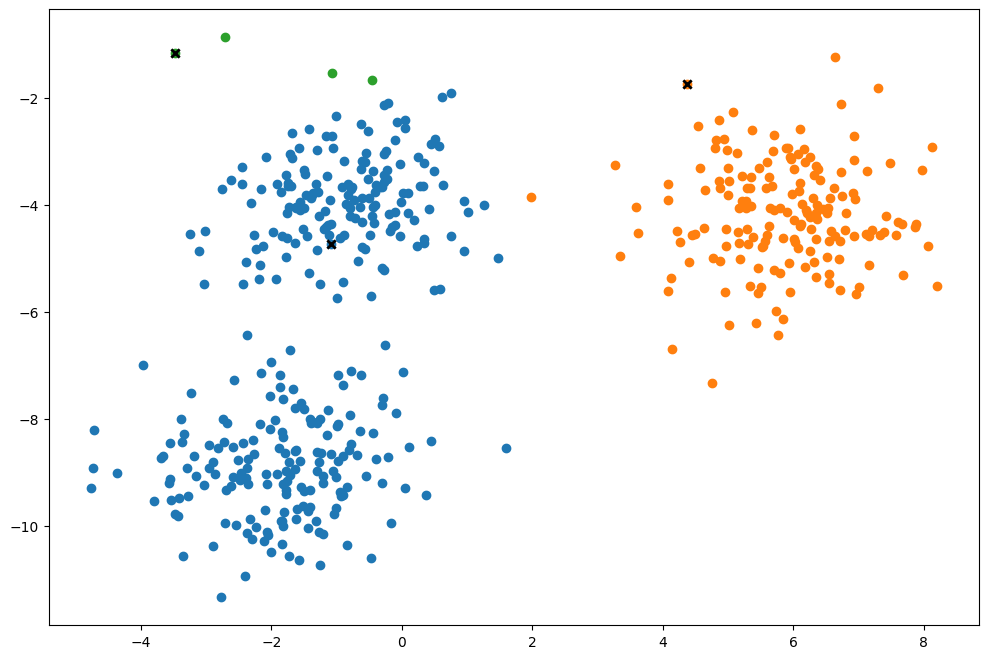

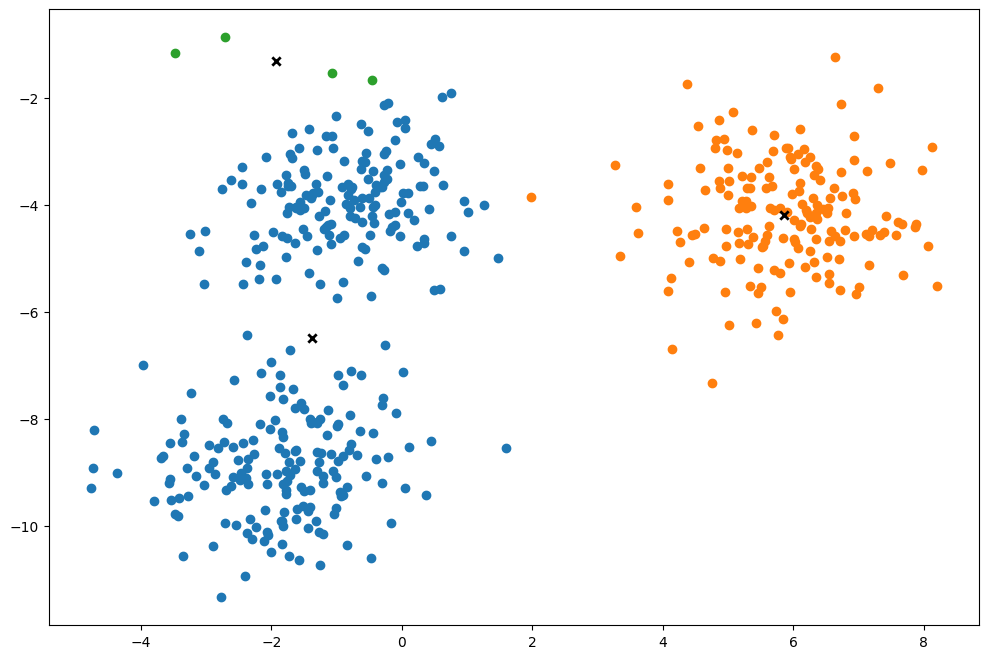

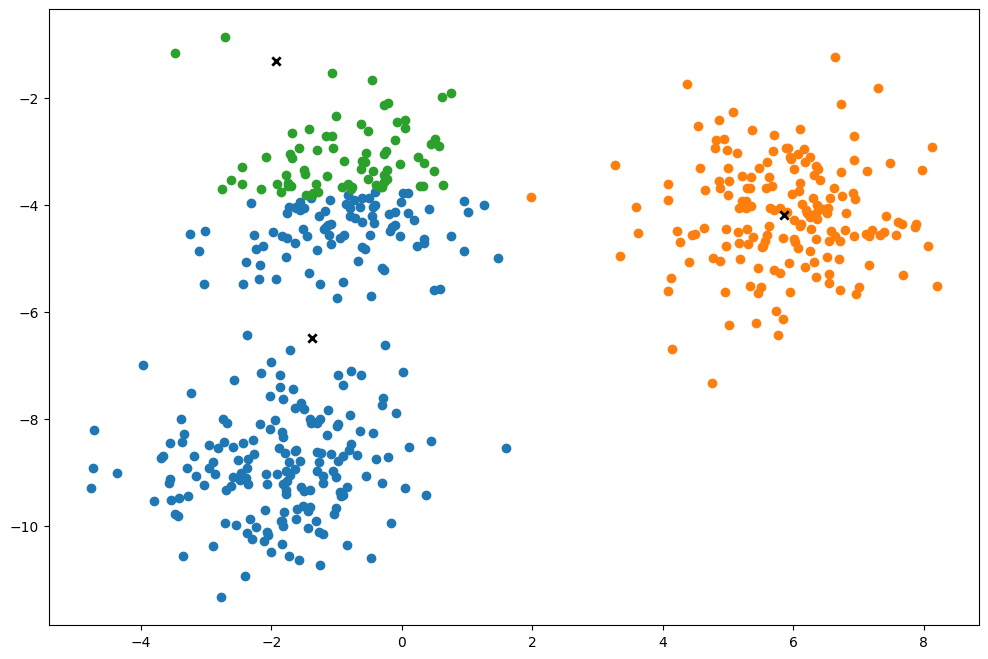

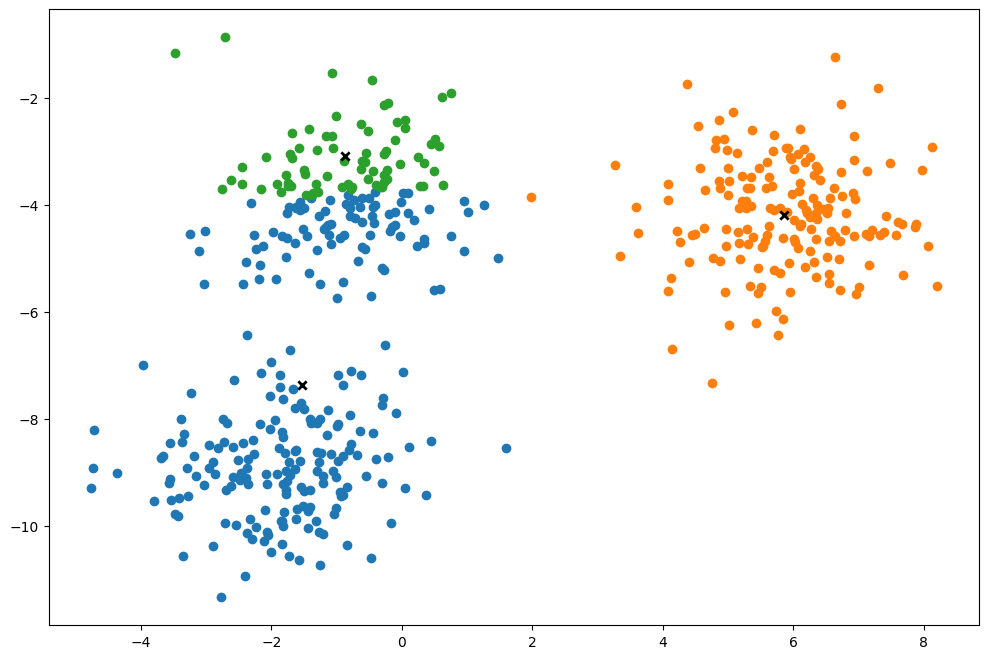

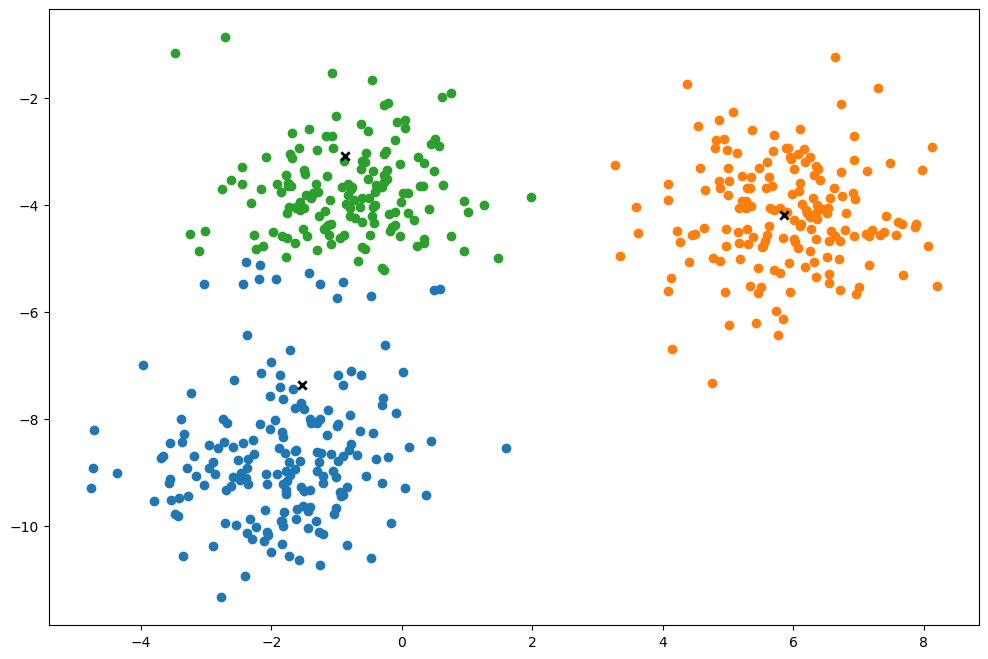

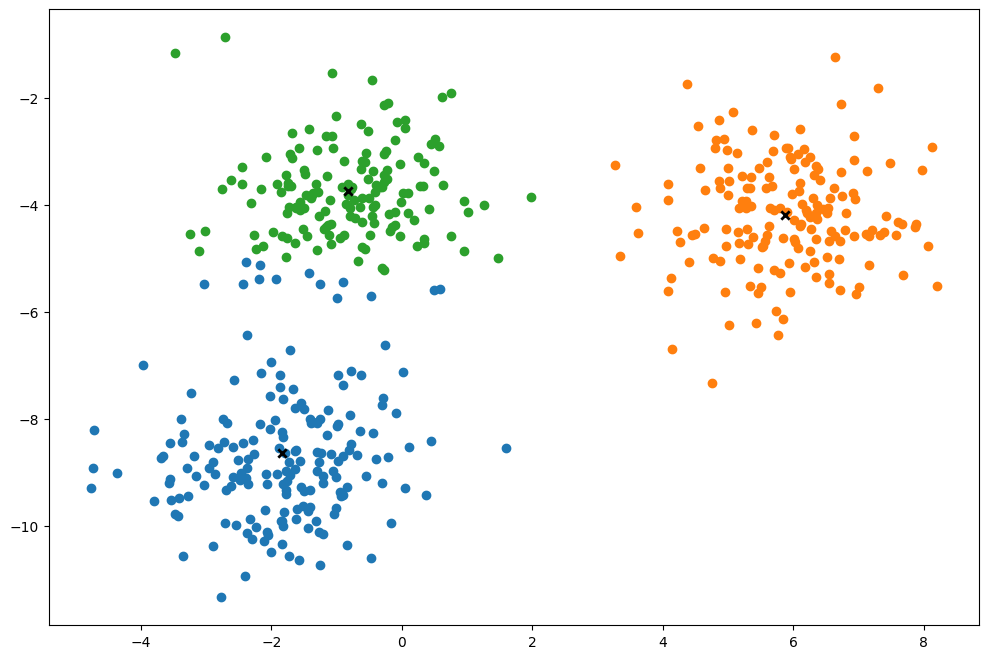

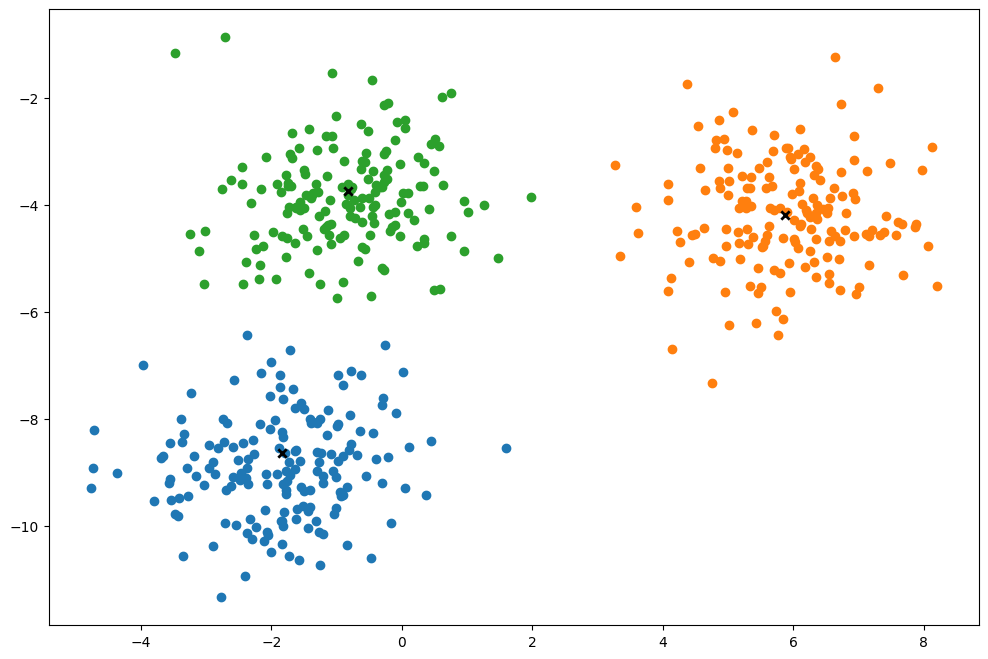

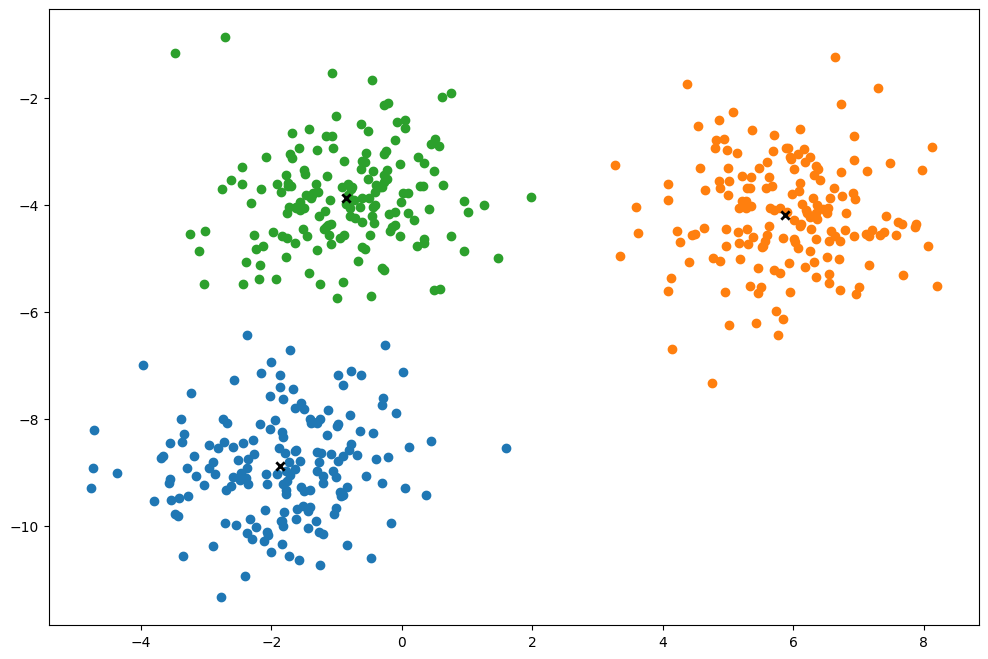

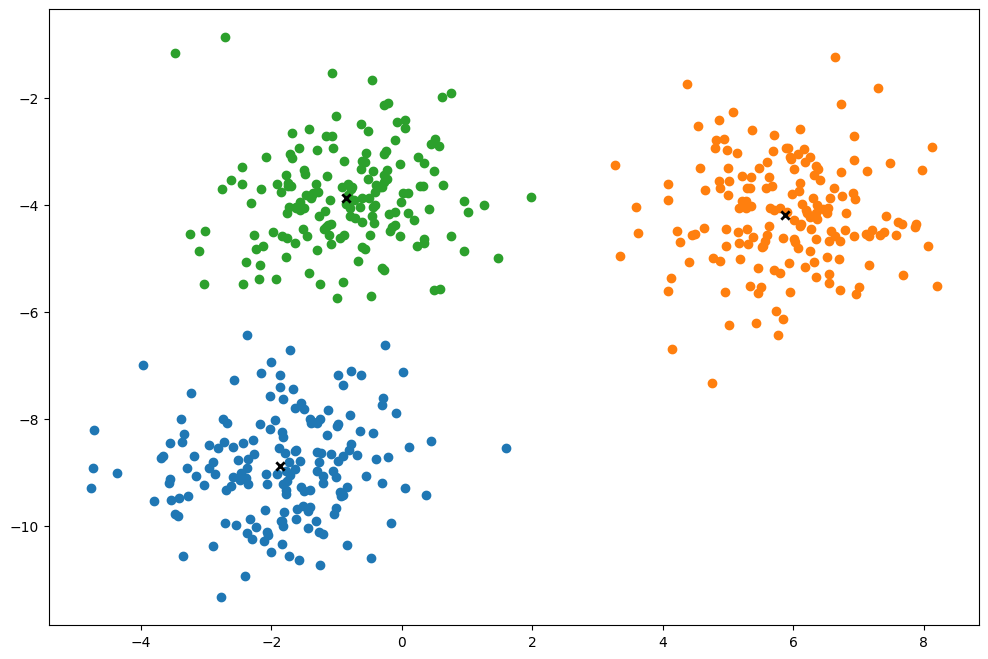

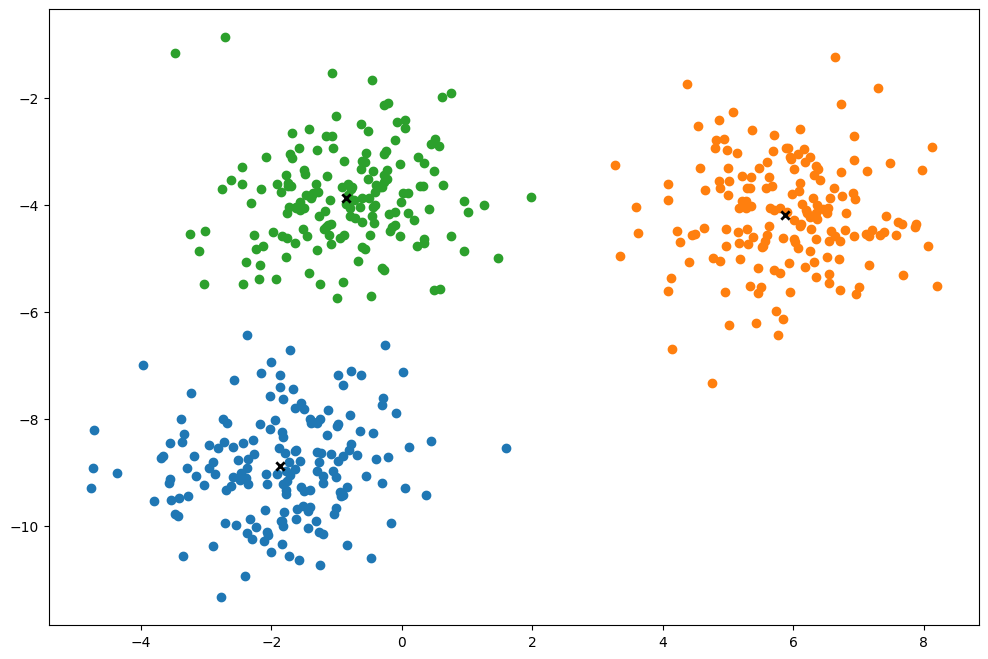

In [6]:
X, y = make_blobs(
        centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
    )
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()